In [62]:
# Dependencies:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [63]:
# Read CSV file:

undp_data=pd.read_csv('2018_all_indicators.csv', encoding ="ISO-8859-1")
undp_data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [64]:
# List Dataframe Column Headers:

list(undp_data)

['dimension',
 'indicator_id',
 'indicator_name',
 'iso3',
 'country_name',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '9999']

In [65]:
# Filter on Columns in scope for the analysis:

new_undp_df= undp_data[['dimension','indicator_name','iso3','country_name','2013', '2014', '2015', '2016','2017']]

pd.DataFrame(new_undp_df).head()

,dimension,indicator_name,iso3,country_name,2013,2014,2015,2016,2017
0,Composite indices,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,168.0,168.0
1,Composite indices,HDI rank,ALB,Albania,NaN,NaN,NaN,69.0,68.0
2,Composite indices,HDI rank,DZA,Algeria,NaN,NaN,NaN,83.0,85.0
3,Composite indices,HDI rank,AND,Andorra,NaN,NaN,NaN,35.0,35.0
4,Composite indices,HDI rank,AGO,Angola,NaN,NaN,NaN,145.0,147.0


In [66]:
# Check for bad data (Null/Blank values):

new_undp_df.count()

dimension         25636
indicator_name    25636
iso3              25636
country_name      25636
2013              17436
2014              17644
2015              18381
2016              16277
2017              12728
dtype: int64

In [67]:
# Data Cleanup - Dropping Null Values(cells/rows):

no_null= new_undp_df.dropna(how='any')
no_null
pd.DataFrame(no_null).head()

,dimension,indicator_name,iso3,country_name,2013,2014,2015,2016,2017
189,Composite indices,Human Development Index (HDI),AFG,Afghanistan,0.487,0.491,0.493,0.494,0.498
190,Composite indices,Human Development Index (HDI),ALB,Albania,0.771,0.773,0.776,0.782,0.785
191,Composite indices,Human Development Index (HDI),DZA,Algeria,0.745,0.747,0.749,0.752,0.754
192,Composite indices,Human Development Index (HDI),AND,Andorra,0.850,0.853,0.854,0.856,0.858
193,Composite indices,Human Development Index (HDI),AGO,Angola,0.554,0.564,0.572,0.577,0.581


In [68]:
# Check again for bad data after dropping off Null/Blank cells:
no_null.count()


dimension         11558
indicator_name    11558
iso3              11558
country_name      11558
2013              11558
2014              11558
2015              11558
2016              11558
2017              11558
dtype: int64

In [69]:
# Insert Sorted Index:

no_null.sort_index(axis =1)

no_null.reset_index(inplace=True)
pd.DataFrame(no_null).head()


,index,dimension,indicator_name,iso3,country_name,2013,2014,2015,2016,2017
0,189,Composite indices,Human Development Index (HDI),AFG,Afghanistan,0.487,0.491,0.493,0.494,0.498
1,190,Composite indices,Human Development Index (HDI),ALB,Albania,0.771,0.773,0.776,0.782,0.785
2,191,Composite indices,Human Development Index (HDI),DZA,Algeria,0.745,0.747,0.749,0.752,0.754
3,192,Composite indices,Human Development Index (HDI),AND,Andorra,0.850,0.853,0.854,0.856,0.858
4,193,Composite indices,Human Development Index (HDI),AGO,Angola,0.554,0.564,0.572,0.577,0.581


In [70]:
# Rename Columns: ISO3 to ISO country code and re-formatting the rest of the column headers:

new_undp_df.columns= ['Dimension', 'Indicator Name', 'ISO Country Code','Country Name', '2013', '2014','2015','2016', '2017']
pd.DataFrame(new_undp_df).head()

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017
0,Composite indices,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,168.0,168.0
1,Composite indices,HDI rank,ALB,Albania,NaN,NaN,NaN,69.0,68.0
2,Composite indices,HDI rank,DZA,Algeria,NaN,NaN,NaN,83.0,85.0
3,Composite indices,HDI rank,AND,Andorra,NaN,NaN,NaN,35.0,35.0
4,Composite indices,HDI rank,AGO,Angola,NaN,NaN,NaN,145.0,147.0


In [71]:
# The Scope of this Analysis has been narrowed down to 2 Indicators of Human Develeopment which are
# Human Development Index (HDI) and Gender Inquality Index (GII)

In [72]:

########################################################################################################################
##################################  Human Development Index (HDI)  #####################################################
########################################################################################################################

# Human Development Index (HDI)= average achievement in three basic dimensions of human 
# development—a long and healthy life, and knowledge and a decent standard of living

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Composite indices")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Human Development Index (HDI)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)


# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5

# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df


no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)


,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Composite indices,Human Development Index (HDI),IND,India,0.61,0.62,0.63,0.64,0.64,0.03,5.44,0.63
1,Composite indices,Human Development Index (HDI),ZAF,South Africa,0.68,0.68,0.69,0.70,0.70,0.02,3.56,0.69
2,Composite indices,Human Development Index (HDI),CHN,China,0.73,0.74,0.74,0.75,0.75,0.02,3.16,0.74
3,Composite indices,Human Development Index (HDI),TUR,Turkey,0.77,0.78,0.78,0.79,0.79,0.02,2.59,0.78
4,Composite indices,Human Development Index (HDI),MEX,Mexico,0.76,0.76,0.77,0.77,0.77,0.02,2.38,0.77
5,Composite indices,Human Development Index (HDI),IDN,Indonesia,0.68,0.68,0.69,0.69,0.69,0.01,1.91,0.69
6,Composite indices,Human Development Index (HDI),CAN,Canada,0.91,0.92,0.92,0.92,0.93,0.02,1.65,0.92
7,Composite indices,Human Development Index (HDI),RUS,Russian Federation,0.80,0.81,0.81,0.82,0.82,0.01,1.49,0.81
8,Composite indices,Human Development Index (HDI),BRA,Brazil,0.75,0.75,0.76,0.76,0.76,0.01,1.47,0.75
9,Composite indices,Human Development Index (HDI),FRA,France,0.89,0.89,0.90,0.90,0.90,0.01,1.35,0.90


In [73]:
g20_countries = no_null[["Country Name","Variance"]]
g20_countries = g20_countries.set_index("Country Name")
g20_countries.head()

,Variance
Country Name,
India,0.03
South Africa,0.02
China,0.02
Turkey,0.02
Mexico,0.02


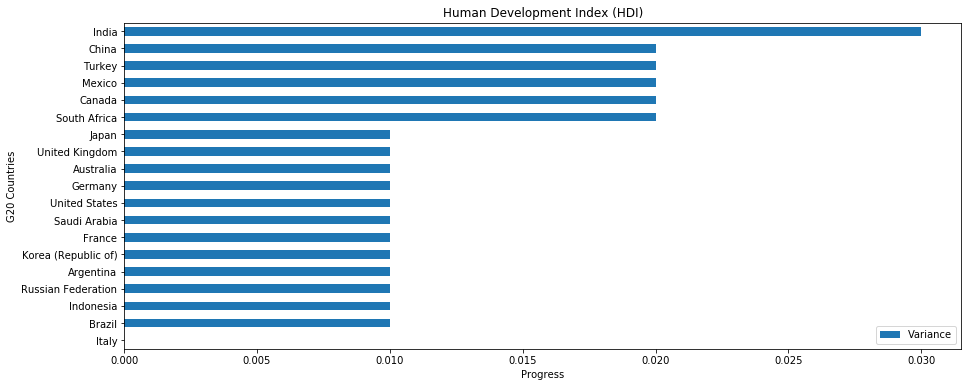

In [96]:
g20_countries.plot(kind="barh", figsize=(15,6))
g20_countries.sort_values('Variance',inplace=True)

plt.title("Human Development Index (HDI)")
plt.xlabel("Progress")
plt.ylabel("G20 Countries")
plt.show()


In [75]:
g20 = no_null[["Country Name","ISO Country Code","2013","2014","2015","2016","2017"]]
countries = g20.set_index("ISO Country Code")
countries.head()
# g20.head() #looks wrong here, index still isn't set

,Country Name,2013,2014,2015,2016,2017
ISO Country Code,,,,,,
IND,India,0.61,0.62,0.63,0.64,0.64
ZAF,South Africa,0.68,0.68,0.69,0.70,0.70
CHN,China,0.73,0.74,0.74,0.75,0.75
TUR,Turkey,0.77,0.78,0.78,0.79,0.79
MEX,Mexico,0.76,0.76,0.77,0.77,0.77


In [76]:
hdi_trend=countries.mean()
years= hdi_trend.keys()
years
hdi_trend

2013    0.821579
2014    0.824737
2015    0.828947
2016    0.832105
2017    0.833158
dtype: float64

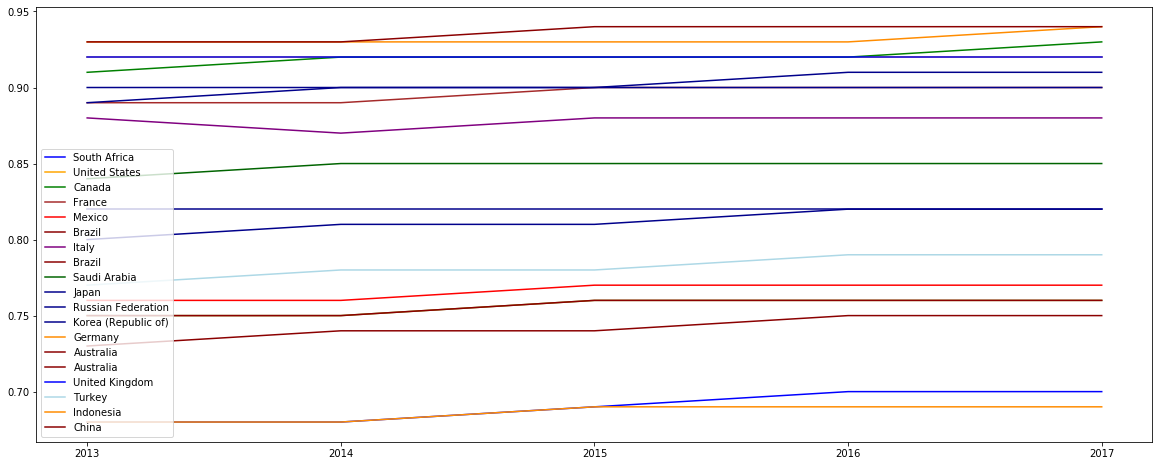

In [94]:

plt.figure(figsize=(20,8))
# world_avg, = plt.plot(years, hdi_trend, color="blue",  label="World Average" )

country_ZAF, = plt.plot(years, countries.loc['ZAF',["2013","2014","2015","2016","2017"]], 
                        color="blue",label=countries.loc['ZAF',"Country Name"])
country_USA, = plt.plot(years, countries.loc['USA',["2013","2014","2015","2016","2017"]], 
                        color="orange",label=countries.loc['USA',"Country Name"])
country_CAN, = plt.plot(years, countries.loc['CAN',["2013","2014","2015","2016","2017"]], 
                        color="green",label=countries.loc['CAN',"Country Name"])
country_FRA, = plt.plot(years, countries.loc['FRA',["2013","2014","2015","2016","2017"]], 
                        color="brown",label=countries.loc['FRA',"Country Name"])
country_MEX, = plt.plot(years, countries.loc['MEX',["2013","2014","2015","2016","2017"]], 
                        color="red",label=countries.loc['MEX',"Country Name"])
country_BRA, = plt.plot(years, countries.loc['BRA',["2013","2014","2015","2016","2017"]], 
                        color="olive",label=countries.loc['BRA',"Country Name"])
country_ITA, = plt.plot(years, countries.loc['ITA',["2013","2014","2015","2016","2017"]], 
                        color="purple",label=countries.loc['ITA',"Country Name"])
country_BRA, = plt.plot(years, countries.loc['BRA',["2013","2014","2015","2016","2017"]], 
                        color="darkred",label=countries.loc['BRA',"Country Name"])
country_SAU, = plt.plot(years, countries.loc['SAU',["2013","2014","2015","2016","2017"]], 
                        color="darkgreen",label=countries.loc['SAU',"Country Name"])
country_JPN, = plt.plot(years, countries.loc['JPN',["2013","2014","2015","2016","2017"]], 
                        color="darkblue",label=countries.loc['JPN',"Country Name"])
country_RUS, = plt.plot(years, countries.loc['RUS',["2013","2014","2015","2016","2017"]], 
                        color="darkblue",label=countries.loc['RUS',"Country Name"])
country_KOR, = plt.plot(years, countries.loc['KOR',["2013","2014","2015","2016","2017"]], 
                        color="darkblue",label=countries.loc['KOR',"Country Name"])
country_DEU, = plt.plot(years, countries.loc['DEU',["2013","2014","2015","2016","2017"]], 
                        color="darkorange",label=countries.loc['DEU',"Country Name"])
country_AUS, = plt.plot(years, countries.loc['AUS',["2013","2014","2015","2016","2017"]], 
                        color="darkred",label=countries.loc['AUS',"Country Name"])
country_ARG, = plt.plot(years, countries.loc['ARG',["2013","2014","2015","2016","2017"]], 
                        color="darkblue",label=countries.loc['ARG',"Country Name"])
country_GBR, = plt.plot(years, countries.loc['GBR',["2013","2014","2015","2016","2017"]], 
                        color="blue",label=countries.loc['GBR',"Country Name"])
country_TUR, = plt.plot(years, countries.loc['TUR',["2013","2014","2015","2016","2017"]], 
                        color="lightblue",label=countries.loc['TUR',"Country Name"])
country_IDN, = plt.plot(years, countries.loc['IDN',["2013","2014","2015","2016","2017"]], 
                        color="darkorange",label=countries.loc['IDN',"Country Name"])
country_CHN, = plt.plot(years, countries.loc['CHN',["2013","2014","2015","2016","2017"]], 
                        color="darkred",label=countries.loc['CHN',"Country Name"])


# Create a legend for our chart
plt.legend(handles=[country_ZAF,country_USA,country_CAN,country_FRA,country_MEX,
                   country_BRA, country_ITA,country_BRA,country_SAU,country_JPN,
                   country_RUS, country_KOR,country_DEU,country_AUS,
                   country_AUS, country_GBR, country_TUR,country_IDN,country_CHN], loc="best")

# Show the chart
plt.show()


In [17]:
# Health Analysis (Life expectancy at birth (years):
# Number of years a newborn infant could expect to live if prevailing patterns):

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Health")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Life expectancy at birth (years)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5
# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df



no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Health,Life expectancy at birth (years),ZAF,South Africa,59.8,61.0,62.0,62.8,63.4,3.6,6.02,61.80
1,Health,Life expectancy at birth (years),IND,India,67.7,68.0,68.3,68.6,68.8,1.1,1.62,68.28
2,Health,Life expectancy at birth (years),TUR,Turkey,75.0,75.2,75.5,75.8,76.0,1.0,1.33,75.50
3,Health,Life expectancy at birth (years),RUS,Russian Federation,70.3,70.7,70.9,71.1,71.2,0.9,1.28,70.84
4,Health,Life expectancy at birth (years),KOR,Korea (Republic of),81.4,81.7,81.9,82.2,82.4,1.0,1.23,81.92
5,Health,Life expectancy at birth (years),BRA,Brazil,74.8,75.0,75.3,75.5,75.7,0.9,1.20,75.26
6,Health,Life expectancy at birth (years),IDN,Indonesia,68.7,68.9,69.0,69.2,69.4,0.7,1.02,69.04
7,Health,Life expectancy at birth (years),MEX,Mexico,76.6,76.8,76.9,77.1,77.3,0.7,0.91,76.94
8,Health,Life expectancy at birth (years),DEU,Germany,80.5,80.7,80.8,81.0,81.2,0.7,0.87,80.84
9,Health,Life expectancy at birth (years),GBR,United Kingdom,81.0,81.2,81.4,81.6,81.7,0.7,0.86,81.38


In [18]:
# Health Analysis (Life expectancy Index):


filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Health")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Life expectancy at birth (years)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5
# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df



no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Health,Life expectancy at birth (years),ZAF,South Africa,59.8,61.0,62.0,62.8,63.4,3.6,6.02,61.80
1,Health,Life expectancy at birth (years),IND,India,67.7,68.0,68.3,68.6,68.8,1.1,1.62,68.28
2,Health,Life expectancy at birth (years),TUR,Turkey,75.0,75.2,75.5,75.8,76.0,1.0,1.33,75.50
3,Health,Life expectancy at birth (years),RUS,Russian Federation,70.3,70.7,70.9,71.1,71.2,0.9,1.28,70.84
4,Health,Life expectancy at birth (years),KOR,Korea (Republic of),81.4,81.7,81.9,82.2,82.4,1.0,1.23,81.92
5,Health,Life expectancy at birth (years),BRA,Brazil,74.8,75.0,75.3,75.5,75.7,0.9,1.20,75.26
6,Health,Life expectancy at birth (years),IDN,Indonesia,68.7,68.9,69.0,69.2,69.4,0.7,1.02,69.04
7,Health,Life expectancy at birth (years),MEX,Mexico,76.6,76.8,76.9,77.1,77.3,0.7,0.91,76.94
8,Health,Life expectancy at birth (years),DEU,Germany,80.5,80.7,80.8,81.0,81.2,0.7,0.87,80.84
9,Health,Life expectancy at birth (years),GBR,United Kingdom,81.0,81.2,81.4,81.6,81.7,0.7,0.86,81.38


In [19]:
#  Education Analysis (Mean years of schooling, Male + Female(years)):

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Education")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Mean years of schooling (years)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5

# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df


no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Education,Mean years of schooling (years),IND,India,5.8,6.1,6.3,6.4,6.4,0.6,10.34,6.20
1,Education,Mean years of schooling (years),BRA,Brazil,7.4,7.4,7.6,7.8,7.8,0.4,5.41,7.60
2,Education,Mean years of schooling (years),JPN,Japan,12.2,12.5,12.5,12.7,12.8,0.6,4.92,12.54
3,Education,Mean years of schooling (years),CHN,China,7.5,7.6,7.7,7.8,7.8,0.3,4.00,7.68
4,Education,Mean years of schooling (years),TUR,Turkey,7.7,7.6,7.8,8.0,8.0,0.3,3.90,7.82
5,Education,Mean years of schooling (years),CAN,Canada,12.9,13.0,13.1,13.1,13.3,0.4,3.10,13.08
6,Education,Mean years of schooling (years),FRA,France,11.2,11.4,11.5,11.5,11.5,0.3,2.68,11.42
7,Education,Mean years of schooling (years),IDN,Indonesia,7.8,7.8,7.9,8.0,8.0,0.2,2.56,7.90
8,Education,Mean years of schooling (years),GBR,United Kingdom,12.6,12.7,12.8,12.9,12.9,0.3,2.38,12.78
9,Education,Mean years of schooling (years),AUS,Australia,12.6,12.7,12.8,12.9,12.9,0.3,2.38,12.78


In [20]:
#  Education Analysis (Expected years of schooling (years)):

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Education")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Expected years of schooling (years)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5

# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df


no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Education,Expected years of schooling (years),AUS,Australia,20.4,20.4,23.3,22.9,22.9,2.5,12.25,21.98
1,Education,Expected years of schooling (years),IND,India,11.6,11.9,12.0,12.3,12.3,0.7,6.03,12.02
2,Education,Expected years of schooling (years),MEX,Mexico,13.3,13.5,13.7,14.1,14.1,0.8,6.02,13.74
3,Education,Expected years of schooling (years),BRA,Brazil,14.8,15.0,15.4,15.4,15.4,0.6,4.05,15.20
4,Education,Expected years of schooling (years),RUS,Russian Federation,14.9,15.0,15.4,15.5,15.5,0.6,4.03,15.26
5,Education,Expected years of schooling (years),SAU,Saudi Arabia,16.3,16.9,16.9,16.9,16.9,0.6,3.68,16.78
6,Education,Expected years of schooling (years),CAN,Canada,15.9,16.3,16.3,16.4,16.4,0.5,3.14,16.26
7,Education,Expected years of schooling (years),TUR,Turkey,14.8,15.2,15.2,15.2,15.2,0.4,2.70,15.12
8,Education,Expected years of schooling (years),CHN,China,13.5,13.8,13.8,13.8,13.8,0.3,2.22,13.74
9,Education,Expected years of schooling (years),ARG,Argentina,17.1,17.3,17.4,17.4,17.4,0.3,1.75,17.32


In [21]:
#  Education Analysis (Education index):

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Education")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Education index")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5

# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df


no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Education,Education index,IND,India,0.52,0.53,0.54,0.56,0.56,0.04,7.96,0.54
1,Education,Education index,BRA,Brazil,0.66,0.66,0.68,0.69,0.69,0.03,4.73,0.67
2,Education,Education index,MEX,Mexico,0.65,0.66,0.67,0.68,0.68,0.03,4.63,0.66
3,Education,Education index,CAN,Canada,0.87,0.89,0.89,0.89,0.90,0.03,3.33,0.89
4,Education,Education index,TUR,Turkey,0.67,0.68,0.68,0.69,0.69,0.02,3.30,0.68
5,Education,Education index,RUS,Russian Federation,0.81,0.81,0.83,0.83,0.83,0.03,3.23,0.82
6,Education,Education index,CHN,China,0.63,0.64,0.64,0.64,0.64,0.02,2.71,0.64
7,Education,Education index,SAU,Saudi Arabia,0.77,0.79,0.79,0.79,0.79,0.02,2.21,0.78
8,Education,Education index,FRA,France,0.82,0.83,0.84,0.84,0.84,0.02,2.19,0.84
9,Education,Education index,JPN,Japan,0.83,0.84,0.84,0.85,0.85,0.02,2.17,0.84


In [22]:
#  Income/composition of resources (Gross national income (GNI) per capita (2011 PPP $)):

filtered_df = new_undp_df.copy()
filtered_df = filtered_df.loc[(filtered_df["Country Name"] == "United States") | (filtered_df["Country Name"] == "Canada")
                             | (filtered_df["Country Name"] == "Russian Federation")
                              | (filtered_df["Country Name"] == "Turkey") | (filtered_df["Country Name"] == "Argentina")
                              | (filtered_df["Country Name"] == "Mexico") | (filtered_df["Country Name"] == "Indonesia")
                              | (filtered_df["Country Name"] == "Saudi Arabia")
                              | (filtered_df["Country Name"] == "South Africa") | (filtered_df["Country Name"] == "India")
                             | (filtered_df["Country Name"] == "Australia") | (filtered_df["Country Name"] == "Brazil")
                             | (filtered_df["Country Name"] == "United Kingdom")
                             | (filtered_df["Country Name"] == "Germany") | (filtered_df["Country Name"] == "China")
                             | (filtered_df["Country Name"] == "Korea (Republic of)")
                             | (filtered_df["Country Name"] == "France") | (filtered_df["Country Name"] == "South Africa")
                             | (filtered_df["Country Name"] == "Italy") | (filtered_df["Country Name"] == "Japan")]
filtered_df = filtered_df.loc[(filtered_df["Dimension"] == "Income/composition of resources")]
filtered_df = filtered_df.loc[(filtered_df["Indicator Name"] == "Gross national income (GNI) per capita (2011 PPP $)")]
filtered_df = filtered_df.iloc[:, [0,1,2,3,-5,-4,-3,-2,-1]]
filtered_df.head(21)

# Analysis (Variance and Variance %):

filtered_df['Variance'] = filtered_df['2017'] - filtered_df['2013']
filtered_df['Variance%'] = (filtered_df['2017'] / filtered_df['2013'] -1)*100
filtered_df['Average'] = (filtered_df['2013'] + filtered_df['2014'] + filtered_df['2015']
                                + filtered_df['2016']++ filtered_df['2017'])/5

# Round Decimals:
rounded_df = pd.DataFrame(np.round(filtered_df, decimals=2))

# Sort Column (Variance%) values in a descending order:
sorted_df = rounded_df.sort_values(by='Variance%', ascending= False )
sorted_df


no_null= sorted_df.dropna(how='any')
no_null
pd.DataFrame(no_null)

# Reset index to assecending numbers based on row number:
new_index = sorted_df.reset_index(drop=True)
new_index.head(22)

,Dimension,Indicator Name,ISO Country Code,Country Name,2013,2014,2015,2016,2017,Variance,Variance%,Average
0,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,CHN,China,11855.0,12775.0,13519.0,14354.0,15270.0,3415.0,28.81,13554.6
1,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,IND,India,5010.0,5322.0,5691.0,6026.0,6353.0,1343.0,26.81,5680.4
2,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,IDN,Indonesia,9362.0,9679.0,10037.0,10437.0,10846.0,1484.0,15.85,10072.2
3,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,TUR,Turkey,21453.0,22203.0,23125.0,23500.0,24804.0,3351.0,15.62,23017.0
4,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,KOR,Korea (Republic of),32781.0,33534.0,34276.0,35122.0,35945.0,3164.0,9.65,34331.6
5,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,MEX,Mexico,15991.0,16292.0,16569.0,16623.0,16944.0,953.0,5.96,16483.8
6,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,USA,United States,51878.0,52752.0,53741.0,54104.0,54941.0,3063.0,5.90,53483.2
7,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,GBR,United Kingdom,37026.0,37598.0,38146.0,38680.0,39116.0,2090.0,5.64,38113.2
8,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,DEU,Germany,43888.0,44429.0,44766.0,45203.0,46136.0,2248.0,5.12,44884.4
9,Income/composition of resources,Gross national income (GNI) per capita (2011 P...,CAN,Canada,41697.0,42383.0,42512.0,42664.0,43433.0,1736.0,4.16,42537.8
